In [1]:
# !pip3 install kafka-python==1.4.7 streamz==0.5.2 --user

In [2]:
import os
import sys

SOURCE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
sys.path.insert(0, SOURCE_DIR)

In [3]:
os.environ['ENABLE_JSON_LOGGING'] = 'true'
os.environ['LOGLEVEL'] = 'DEBUG'
os.environ['ENABLE_OPENTELEMETRY_JAEGER'] = 'true'

In [4]:
import waterhealer as wh
from waterhealer import Stream
import json
import time
import logging

wh.__version__

'0.1.6'

In [5]:
def json_loads(rows):
    results = []
    for row in rows:
        results.append(json.loads(row))
        
    return results

def increment_left(rows):
    results = []
    for row in rows:
        row = row.copy()
        row['left'] = row['data'] + 1
        results.append(row)
        
    logging.info('increment_left halloooo')
    time.sleep(2)
    return results

def increment_right(rows):
    results = []
    for row in rows:
        row = row.copy()
        row['right'] = row['data'] + 1
        results.append(row)
        
    logging.info('increment_right halloooo')
    return results

def combine(tuples):
    
    left, right = tuples
    results = []
    for i in range(len(left)):
        results.append(left[i]['left'] + right[i]['right'])
    
    logging.info('need to combine')
    
    return results

In [6]:
source = Stream(checkpoint = True)
partition = source.partition(5, checkpoint = True)
s = partition.map(json_loads, checkpoint = True)
left = s.map(increment_left, checkpoint = True)
right = s.map(increment_right, checkpoint = True)
left.zip(right).map(combine, checkpoint = True).sink(print)

Output()

{"written_at": "2022-01-06T08:10:31.382Z", "written_ts": 1641456631382539000, "msg": "run ['dot', '-Tpng']", "type": "log", "logger": "graphviz.backend", "thread": "MainThread", "level": "DEBUG", "module": "backend", "line_no": 153, "function_name": null, "emit_id": null}


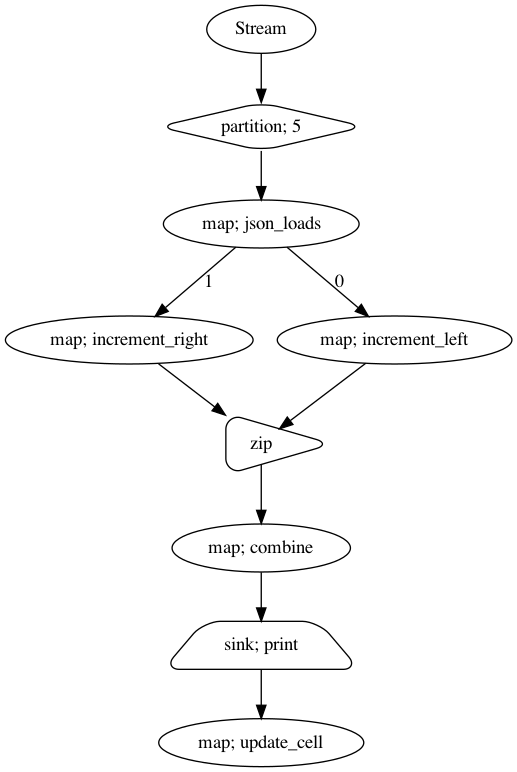

In [7]:
source.visualize()

In [8]:
for i in range(5):
    data = {'i': i, 'data': i + 1}
    source.emit(json.dumps(data))
    time.sleep(0.1)

{"written_at": "2022-01-06T08:10:31.842Z", "written_ts": 1641456631842769000, "msg": "{'function_name': 'Stream', 'data': '{\"i\": 0, \"data\": 1}'}", "type": "log", "logger": "root", "thread": "MainThread", "level": "INFO", "module": "core", "line_no": 547, "emit_id": "8aea8d1d-d80b-4dc7-9046-56f46c93f7f7"}
8aea8d1d-d80b-4dc7-9046-56f46c93f7f7 Stream
{"written_at": "2022-01-06T08:10:31.983Z", "written_ts": 1641456631983351000, "msg": "{'function_name': 'Stream', 'data': '{\"i\": 1, \"data\": 2}'}", "type": "log", "logger": "root", "thread": "MainThread", "level": "INFO", "module": "core", "line_no": 547, "emit_id": "360705c4-b1d7-4e05-bdac-cb74afa276b4"}
360705c4-b1d7-4e05-bdac-cb74afa276b4 Stream
{"written_at": "2022-01-06T08:10:32.087Z", "written_ts": 1641456632087864000, "msg": "{'function_name': 'Stream', 'data': '{\"i\": 2, \"data\": 3}'}", "type": "log", "logger": "root", "thread": "MainThread", "level": "INFO", "module": "core", "line_no": 547, "emit_id": "a4a5280f-157a-411a-b8